This script runs some preliminary event segmentation analysis. The event segmentation analysis itself is adapted from BrainIAK tutorial 12 - HMM. The within vs across analysis is adapted from Jamal's code in `hmm_K_sweep_paper.py`

In [ ]:
!pip install brainiak

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from brainiak.eventseg.event import EventSegment

In [3]:
roi = 'A1'
filepath = 'drive/MyDrive/fMRI_music_data/%s_by_subject_sorted_conds/'%roi
subjects = ['03','15','20','23']
n_sub = len(subjects)

In [5]:
# load in the data from all subjects
data = []
for subj in subjects: 
  data.append(np.load(filepath+'%s_sub-1%s.npy'%(roi,subj)))

# recast the list into an array and check the shape
data = np.asarray(data)
print(data.shape)

(4, 516, 1776)


In [6]:
# reshape the data into conditions and runs
n_sub = len(subjects)
n_voxels = data.shape[1]
n_TRs = 148
n_conds = 4
n_reps = 3

orig_data = np.copy(data)
orig_data = np.reshape(orig_data,(n_sub,n_voxels,n_TRs,n_conds,n_reps),order='F')
print(orig_data.shape)

(4, 516, 148, 4, 3)


In [7]:
# normalize within each run and subject
# matrix has to be time (n_samples) x voxels (n_features)
orig_data_norm = np.zeros_like(orig_data)
for s in range(n_sub):
  for c in range(n_conds):
    for r in range(n_reps):
      this_data_norm = StandardScaler().fit_transform(orig_data[s,:,:,c,r].T)
      orig_data_norm[s,:,:,c,r] = this_data_norm.T

# Testing and exploring

Fit HMM to rep 1 of Intact to explore this class.

In [8]:
# grab the data 
data_rep1_I = orig_data_norm[:,:,:,0,0]
print(data_rep1_I.shape)

(4, 516, 148)


In [11]:
# average over all subjects
avg_data_rep1_I = np.mean(data_rep1_I,axis=0)
print(avg_data_rep1_I.shape)

(516, 148)


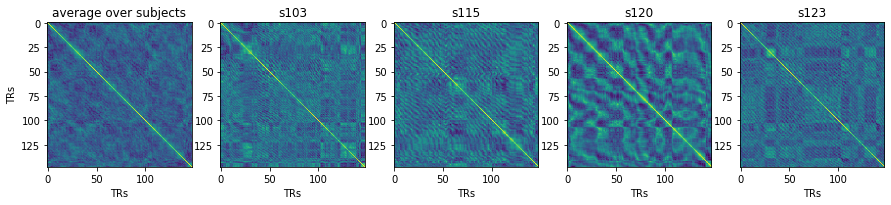

In [19]:
# plot the TRxTR matrices for each subject and the average over all subjects
fig,ax = plt.subplots(1,5,figsize=(15,8))
ax[0].imshow(np.corrcoef(avg_data_rep1_I.T))
ax[0].set_title('average over subjects')
ax[0].set_ylabel('TRs')
ax[0].set_xlabel('TRs')
for s in range(n_sub):
  ax[s+1].imshow(np.corrcoef(data_rep1_I[s,:,:].T))
  ax[s+1].set_title('s1%s'%subjects[s])
  ax[s+1].set_xlabel('TRs')